# Hunting Season

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns

<br />

$$
\begin{align}
\frac{\partial P}{\partial t} = kP \cdot (1 - \frac{P}{N}) && P(0) = P_0
\end{align}
$$

<br />

In [259]:
years = 50

# deer
k = 0.4
N = 100_000
P_0 = N * 0.9

# hunters
harvest_per_year_mean = 10_000
harvest_per_year_stdev = 2_000

In [260]:
## define time domain
t = np.linspace(0, years, years)
dt = t[1] - t[0]

In [261]:
## define hunter's effect
deer_killed_per_year = np.random.normal(
    loc=harvest_per_year_mean, 
    scale=harvest_per_year_stdev,
    size=years
)

In [262]:
## define initial conditions
P = np.zeros(years)
P[0] = P_0

In [263]:
for n in range(0, years - 1):
        
    # derivatives for the humans
    dP = k * P[n] * (1 - (P[n] / N))
        
    ## calculate step forward
    P[n+1] = P[n] + (dP * dt)
    
    ## substract kill killed by hunters
    P[n+1] = P[n+1] - deer_killed_per_year[n]

In [264]:
df = pd.DataFrame({
    'population': P,
    'years': t
})

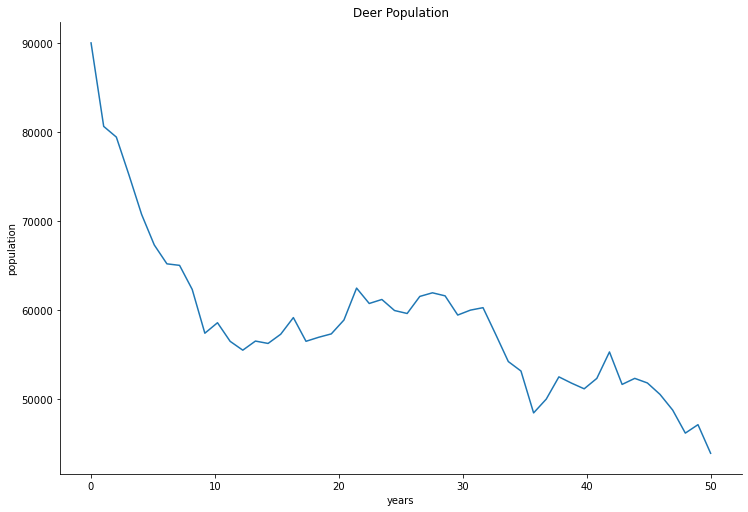

In [265]:
line = sns.relplot(
    data=df,
    x='years',
    y='population',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Deer Population"
)

In [266]:
trials = 50

In [267]:
df = pd.DataFrame({'years': t})

for e in range(trials):
    ## define hunter's effect
    deer_killed_per_year = np.random.normal(
        loc=harvest_per_year_mean, 
        scale=harvest_per_year_stdev,
        size=years
    )
    
    ## define initial conditions
    P = np.zeros(years)
    P[0] = P_0
    
    for n in range(0, years - 1):
        
        # derivatives for the humans
        dP = k * P[n] * (1 - (P[n] / N))
        
        ## calculate step forward
        P[n+1] = P[n] + (dP * dt)
    
        ## substract kill killed by hunters
        P[n+1] = P[n+1] - deer_killed_per_year[n]
        
        
    df[e] = P
    

In [268]:
df.shape

(50, 51)

In [269]:
df = df.set_index('years')

In [270]:
df_melted = pd.melt(df.reset_index(), id_vars=['years'])

In [271]:
df_melted

,years,variable,value
0,0.000000,0,90000.000000
1,1.020408,0,82473.698340
2,2.040816,0,80310.116200
3,3.061224,0,78520.938626
4,4.081633,0,72509.908285
...,...,...,...
2495,45.918367,49,54927.984512
2496,46.938776,49,55721.834654
2497,47.959184,49,55477.060326
2498,48.979592,49,53910.356444


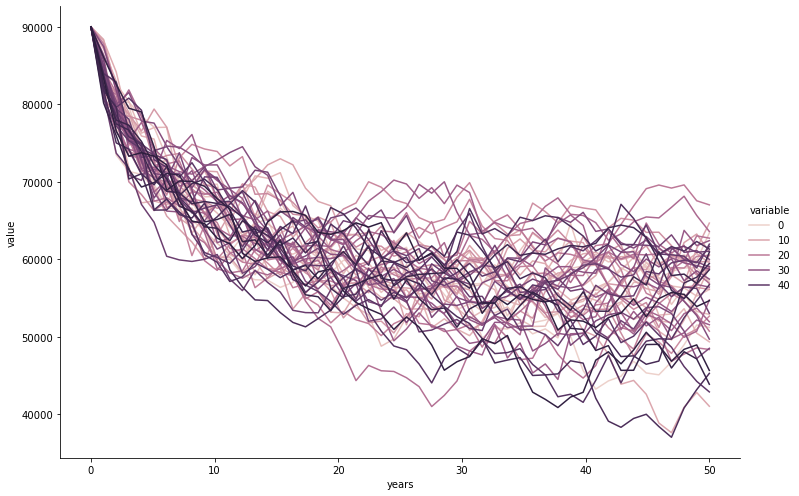

In [272]:
line = sns.relplot(
    data=df_melted,
    x='years',
    y='value',
    hue='variable',
    height=7,
    aspect=1.5,
    kind='line'
)



### Step 1



What is the average length of time before the fish population in the lake reaches zero?

### Step 2

The local Fish and Wildlife Department wants to regulate the number of fish a company can catch each year, creating an upper bound somewhere between 100,000 and 200,000. Revise your model above to explore the impact of such a regulation.

What would you recommend as a good number for this regulation that will balance a sustainable ecosystem with the interests of the fishing companies?

Back up your decision with graphs and analysis.

### Step 3

The values above for the number of fish in the Great Lakes, the average number of fishing caught, the number of fishing companies, the number of fishing companies, etc, are all very, very rough and incorrect estimates.

Research the actual fishing situation in Michigan by reading about the [current commercial fishing industry](https://www.bridgemi.com/michigan-environment-watch/commercial-fishing-sinking-fast-michigan-time-more-regulations), the [state commercial fishing regulations](https://www.michigan.gov/dnr/0,4570,7-350-79136_79236_80538_80541---,00.html), and a [history of commercial fishing in Michigan](https://www.michigan.gov/dnr/0,4570,7-350-79136_79236_80538_80541-424724--,00.html).

What are some of the largest errors in the numerical estimates used above? Decide on your own estimates and rerun the simulation above to provide a more accurate picture.

### Step 4

Discuss one structural simplification we made in our simulation above, such as ignoring tribal fishing allowances, or the zebra muscle invasion.

Develop a way to align your model more closely with the actual situation of fish population dynamics. Run your new simulation and report on your results.

